In [3]:
import numpy as np

p1_step    = np.argmin(np.loadtxt("/h1/bhoon/20220725_pix2pix_compare/p1/fid.txt"))   *50+50
p1n_1_step = np.argmin(np.loadtxt("/h1/bhoon/20220725_pix2pix_compare/p1n-1/fid.txt"))*50+50
pa_step    = np.argmin(np.loadtxt("/h1/bhoon/20220725_pix2pix_compare/pa/fid.txt"))   *50+50
pana_step  = np.argmin(np.loadtxt("/h1/bhoon/20220725_pix2pix_compare/pana/fid.txt")) *50+50

In [4]:
p1_step, p1n_1_step, pa_step, pana_step

(4800, 5000, 3650, 3200)

In [5]:
import tensorflow as tf

p1_model    = tf.keras.models.load_model("/h1/bhoon/20220725_pix2pix_compare/p1/G_{}.h5".format(str(p1_step).zfill(5)))
p1n_1_model = tf.keras.models.load_model("/h1/bhoon/20220725_pix2pix_compare/p1n-1/G_{}.h5".format(str(p1n_1_step).zfill(5)))
pa_model    = tf.keras.models.load_model("/h1/bhoon/20220725_pix2pix_compare/pa/G_{}.h5".format(str(pa_step).zfill(5)))
pana_model  = tf.keras.models.load_model("/h1/bhoon/20220725_pix2pix_compare/pana/G_{}.h5".format(str(pana_step).zfill(5)))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob
os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [7]:
def show_grid(data,r=4,c=4,jump=1,title='',save='',cmap='gray'):
    plt.figure(figsize=(c*2+1,r*2+1))
    i = 1
    for j in range(0,len(data),jump):
        dat = data[j]
        plt.subplot(r, c, i) 
        plt.imshow(dat, cmap=cmap)
        plt.axis('off')
        i+=1
        if i > r*c: break
    if title:
        plt.suptitle(title)
    if save:
        plt.savefig(save, bbox_inches='tight', pad_inches=0)
        plt.close()
    plt.show()
    
def from_bin(fname,nx,nz):
    fopen=open(fname,'rb')
    data=np.fromfile(fopen,dtype=np.float32)
    data=data.reshape(nx,nz)
    return data

def bin_to_refl_patch(clist_path, ndata=200):
    result=[]
    for cp in clist_path:
        for di in range(1,ndata+1):
            c = cp+'/model.bin.{}'.format(str(di).zfill(5))
            dat = from_bin(c,1024,256)[::8].transpose()
            result.append(dat[:128])
            result.append(dat[128:])
    return np.array(result)

# def bin_to_refl_patch(clist_path, ndata=200):
#     result=[]
#     for cp in clist_path:
#         for di in range(1,ndata+1):
#             c = cp+'/model.bin.{}'.format(str(di).zfill(5))
#             dummy = np.zeros((376,128))
#             dat = from_bin(c,1001,376)[::8].transpose()
#             dummy[:,:126] = dat
#             dummy[:,-2] = dat[:,-1]
#             dummy[:,-1] = dat[:,-1]
#             dat = dummy
#             result.append(dat[:128])
#             result.append(dat[128:256])
#             result.append(dat[-128:])
#     return np.array(result)

# def patch2_sub_sample_from_bin_flist(flist):
#     result = []
#     for i in range(len(flist)):
#         dat = from_bin(flist[i],1024,256)[::8].transpose()
#         result.append(dat[:128])
#         result.append(dat[128:])
#     return np.array(result)

def asc_to_edge_patch(clist_path, ndata=200, xs=4000,ys=1500,xr=128,yr=256):
    result=[]
    for cp in clist_path:
        for di in range(1,ndata+1):
            clist = sorted(glob.glob(cp+'/label.asc.{}.*'.format(str(di).zfill(5))))
            _edge = np.zeros((yr,xr))
            
            for cf in clist:
                coor = np.loadtxt(cf).astype(float)
                coor[:,0], coor[:,1]  = (coor[:,0]/ys*yr).astype(int), (coor[:,1]/xs*xr).astype(int)
                coor = coor.astype(int)
                for c in coor:
                    try:
                        _edge[c[0]-1:c[0]+1,c[1]-1:c[1]+1] = 1
                    except:
                        pass
            result.append(_edge[:128])
            result.append(_edge[128:])
    return np.array(result)

# def asc_to_edge_patch(clist_path, ndata=200, xs=4000,ys=1500,xr=128,yr=376):
#     result=[]
#     for cp in clist_path:
#         for di in range(1,ndata+1):
#             clist = sorted(glob.glob(cp+'/label.asc.{}.*'.format(str(di).zfill(5))))
#             _edge = np.zeros((yr,xr))
            
#             for cf in clist:
#                 coor = np.loadtxt(cf).astype(float)
#                 coor[:,0], coor[:,1]  = (coor[:,0]/ys*yr).astype(int), (coor[:,1]/xs*xr).astype(int)
#                 coor = coor.astype(int)
#                 for c in coor:
#                     try:
#                         _edge[c[0]-1:c[0]+1,c[1]-1:c[1]+1] = 1
#                     except:
#                         pass
#             result.append(_edge[:128])
#             result.append(_edge[128:256])
#             result.append(_edge[-128:])
#     return np.array(result)

In [8]:
mlist_path = sorted(glob.glob("/s1/bhoon/20220705_fault/out_model*"))
mlist_path

['/s1/bhoon/20220705_fault/out_model1', '/s1/bhoon/20220705_fault/out_model2']

In [9]:
clist_path = sorted(glob.glob("/s1/bhoon/20220705_fault/out_label*"))
clist_path

['/s1/bhoon/20220705_fault/out_label1', '/s1/bhoon/20220705_fault/out_label2']

In [10]:
refl_patch = bin_to_refl_patch(mlist_path,ndata=600)
refl_patch.shape

(2400, 128, 128)

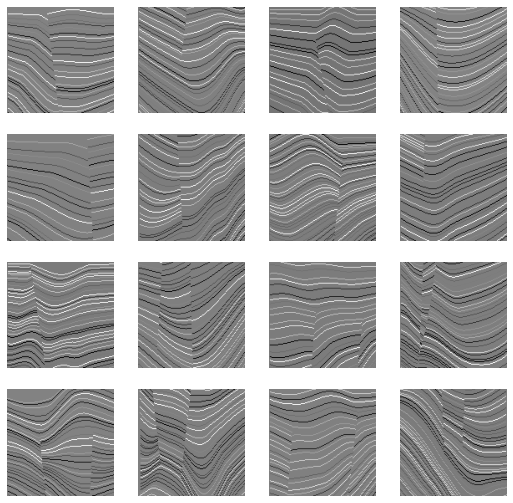

In [11]:
show_grid(refl_patch[::135])

In [12]:
edge_patch = asc_to_edge_patch(clist_path,ndata=600)

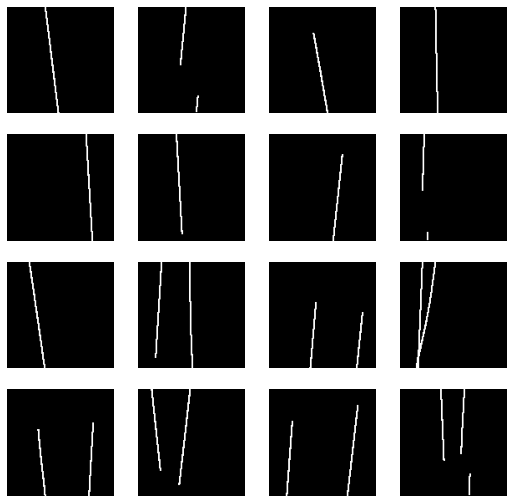

In [13]:
show_grid(edge_patch[::135])

In [14]:
refl_patch.shape, edge_patch.shape

((2400, 128, 128), (2400, 128, 128))

positive peaks are 1


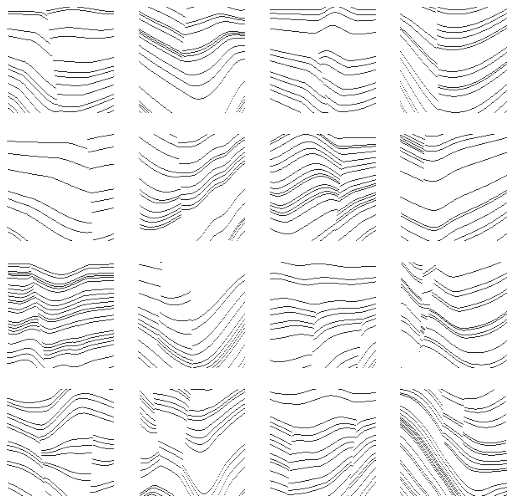

positive peaks are 1 and negative peaks are -1


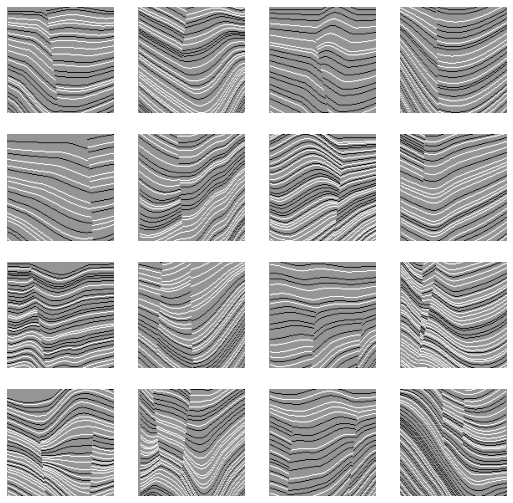

positive peaks are amps


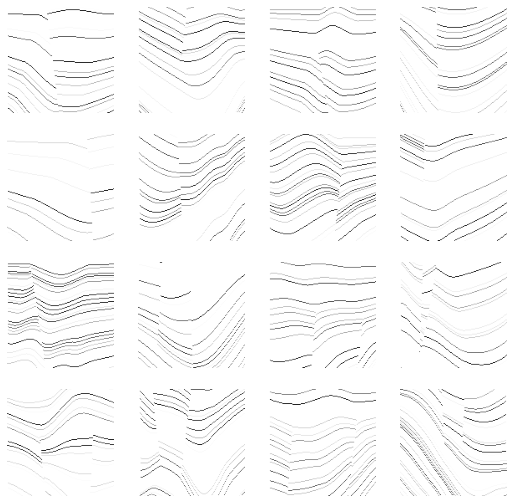

positive peaks are amps and negative peaks are amps


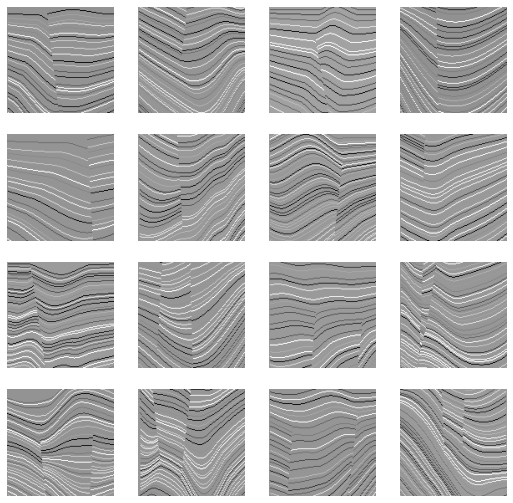

In [15]:
refl_patch_IN_p1    = np.where(refl_patch>0,1,0)

refl_patch_IN_p1n_1 = np.where(refl_patch>0,1,refl_patch)
refl_patch_IN_p1n_1 = np.where(refl_patch_IN_p1n_1<0,-1,refl_patch_IN_p1n_1)

refl_patch_IN_pa    = np.where(refl_patch>0,refl_patch,0)

refl_patch_IN_pana  = refl_patch

# refl_patch_IN = refl_patch
print("positive peaks are 1")
show_grid(refl_patch_IN_p1[::135],cmap='Greys')
print("positive peaks are 1 and negative peaks are -1")
show_grid(refl_patch_IN_p1n_1[::135],cmap='Greys')
print("positive peaks are amps")
show_grid(refl_patch_IN_pa[::135],cmap='Greys')
print("positive peaks are amps and negative peaks are amps")
show_grid(refl_patch_IN_pana[::135],cmap='Greys')

In [16]:
# fig, ax = plt.subplots(1,2,figsize=(20,10))
# ax[0].imshow(refl_patch[1000])
# ax[1].imshow(edge_patch[1000])
# plt.show()

In [17]:
refl_patch_OUT_p1    = p1_model.predict(refl_patch_IN_p1,batch_size=128)
refl_patch_OUT_p1n_1 = p1n_1_model.predict(refl_patch_IN_p1n_1,batch_size=128)
refl_patch_OUT_pa    = pa_model.predict(refl_patch_IN_pa,batch_size=128)
refl_patch_OUT_pana  = pana_model.predict(refl_patch_IN_pana,batch_size=128)

positive peaks are 1


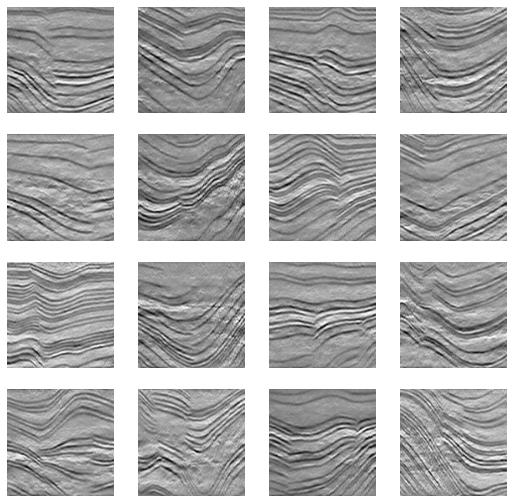

positive peaks are 1 and negative peaks are -1


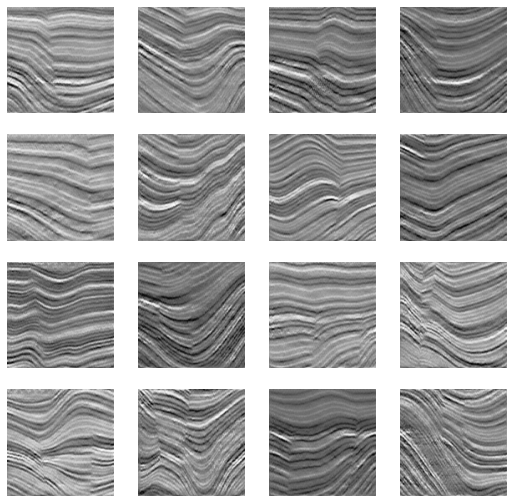

positive peaks are amps


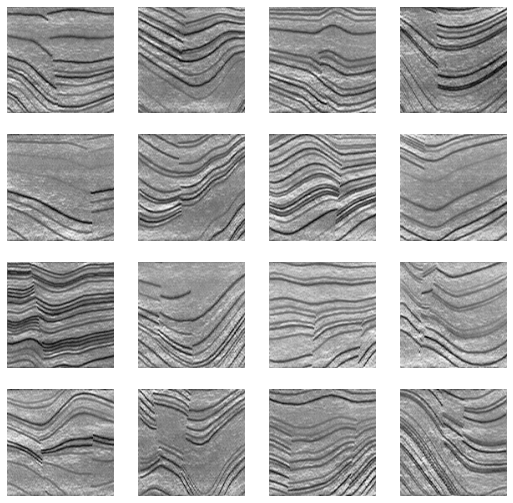

positive peaks are amps and negative peaks are amps


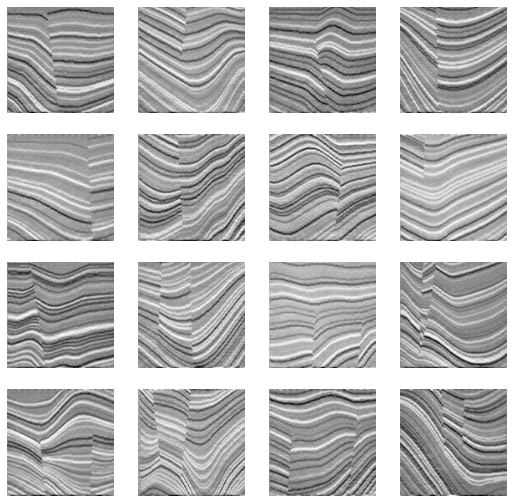

In [18]:
# refl_patch_IN = refl_patch
print("positive peaks are 1")
show_grid(refl_patch_OUT_p1[::135],cmap='Greys')
print("positive peaks are 1 and negative peaks are -1")
show_grid(refl_patch_OUT_p1n_1[::135],cmap='Greys')
print("positive peaks are amps")
show_grid(refl_patch_OUT_pa[::135],cmap='Greys')
print("positive peaks are amps and negative peaks are amps")
show_grid(refl_patch_OUT_pana[::135],cmap='Greys')

In [19]:
fault_idx = [500,1000,1500,2000]

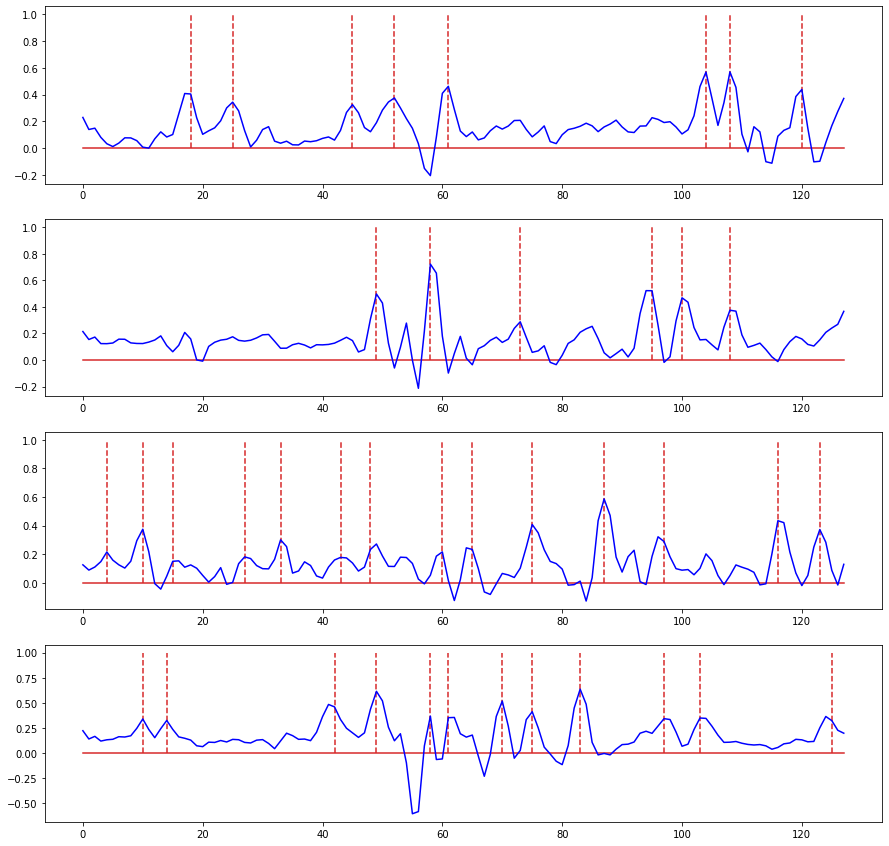

In [20]:
RI = refl_patch_IN_p1 
RO = refl_patch_OUT_p1  
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

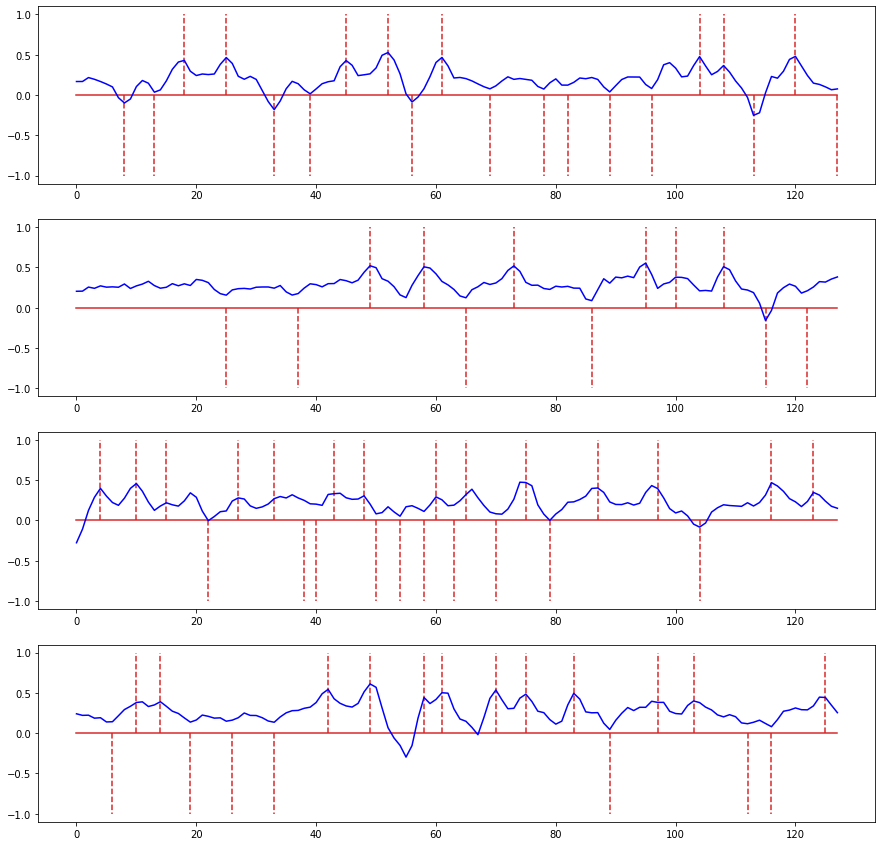

In [21]:
RI = refl_patch_IN_p1n_1
RO = refl_patch_OUT_p1n_1  
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

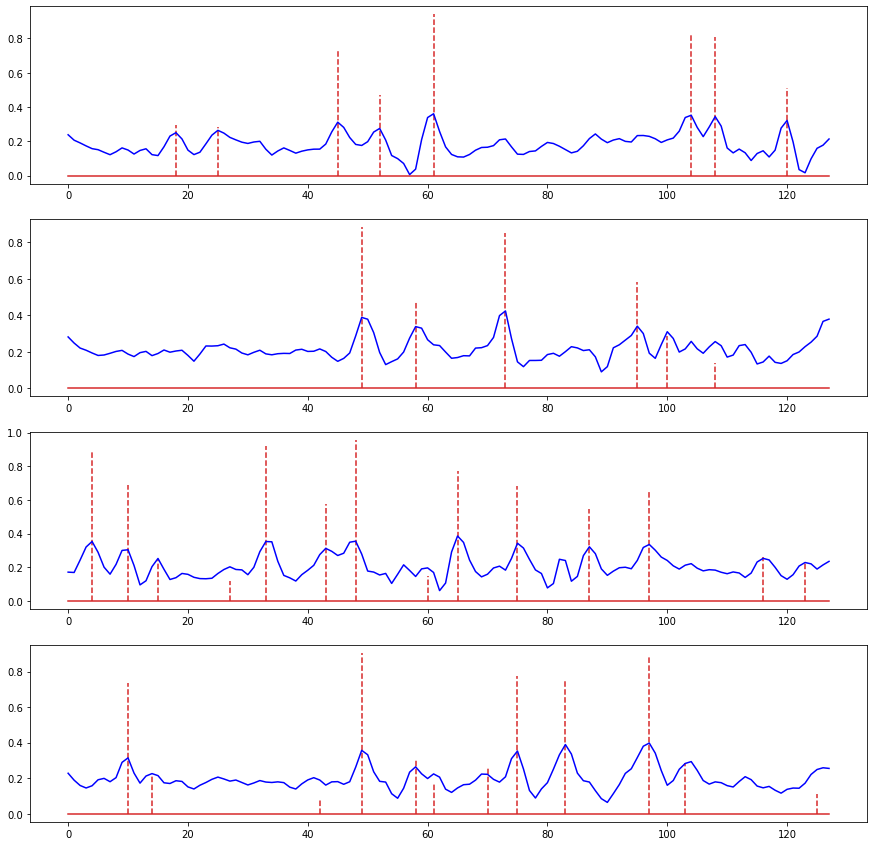

In [22]:
RI = refl_patch_IN_pa
RO = refl_patch_OUT_pa  
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

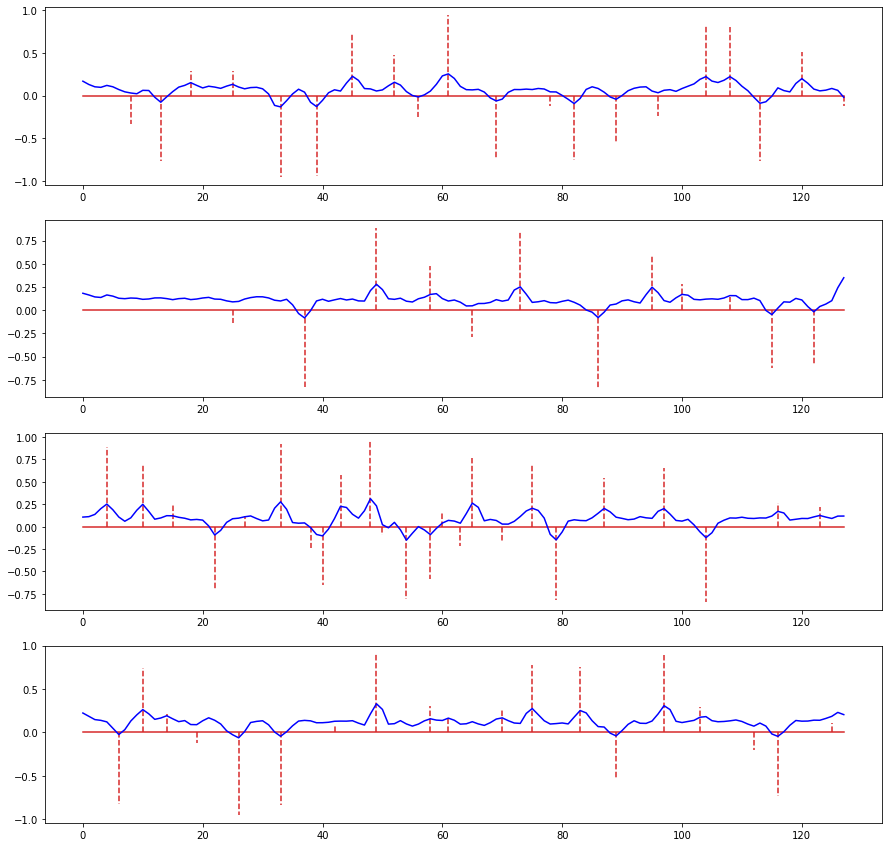

In [23]:
RI = refl_patch_IN_pana
RO = refl_patch_OUT_pana 
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

In [24]:
def standard_scaler(data):
    scaled = []
    for d in data:
        scaled.append((d - np.mean(d))/np.std(d))
    return np.array(scaled)

In [25]:
scaled_refl_patch_OUT_p1    = standard_scaler(refl_patch_OUT_p1)
scaled_refl_patch_OUT_p1n_1 = standard_scaler(refl_patch_OUT_p1n_1)
scaled_refl_patch_OUT_pa    = standard_scaler(refl_patch_OUT_pa)
scaled_refl_patch_OUT_pana  = standard_scaler(refl_patch_OUT_pana)

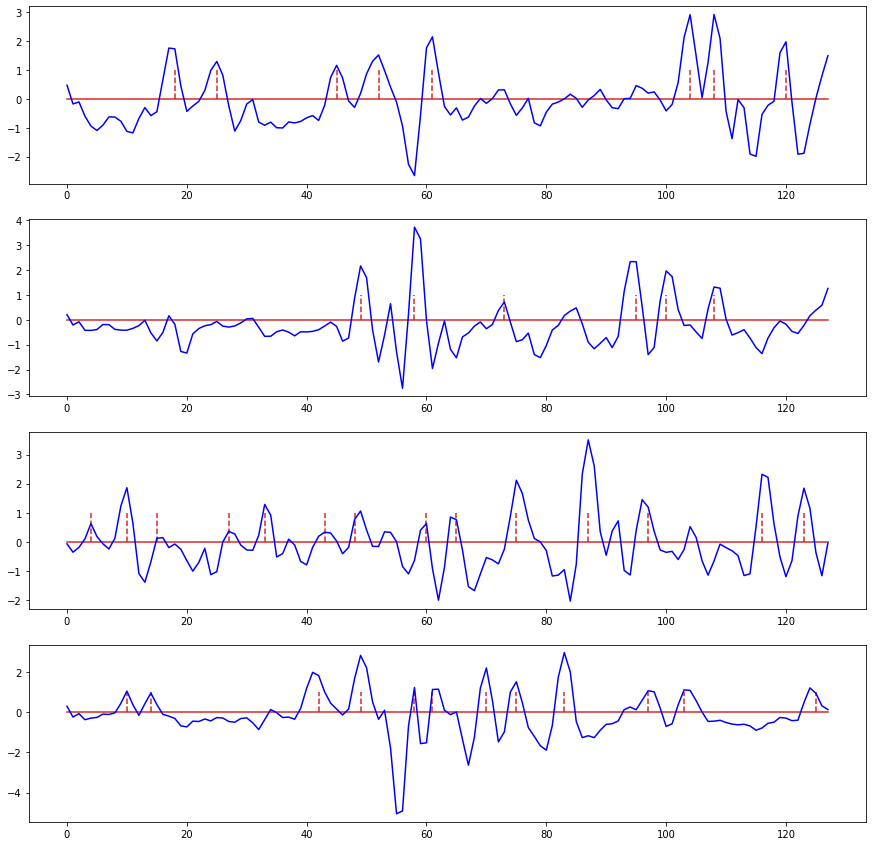

In [26]:
RI = refl_patch_IN_p1 
RO = scaled_refl_patch_OUT_p1  
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

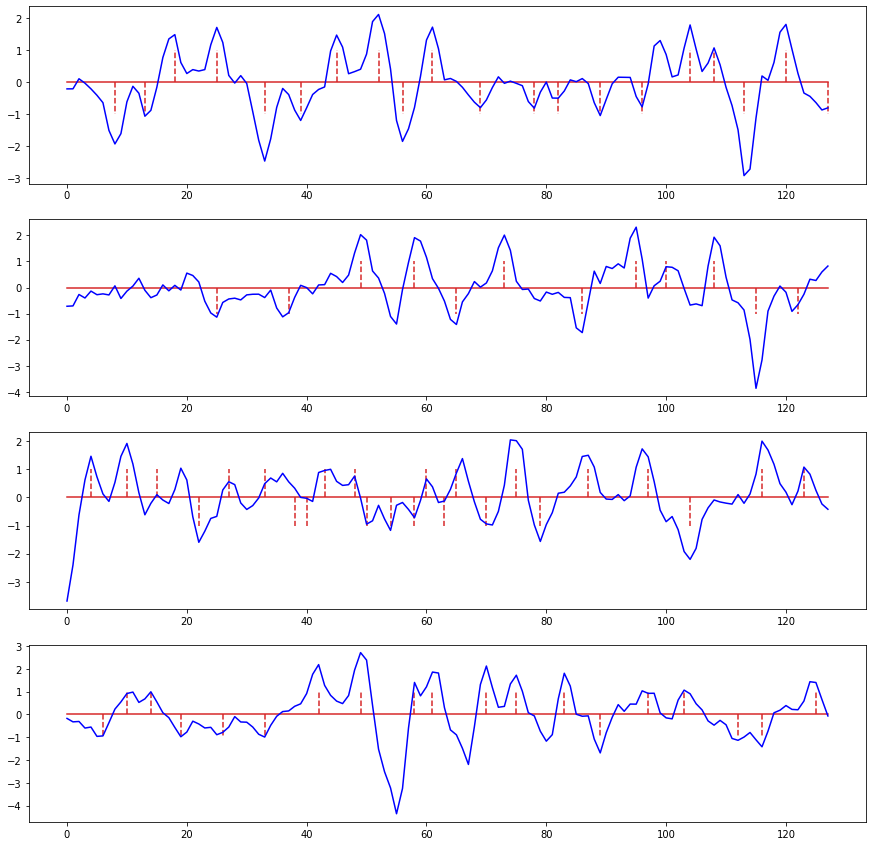

In [27]:
RI = refl_patch_IN_p1n_1
RO = scaled_refl_patch_OUT_p1n_1  
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

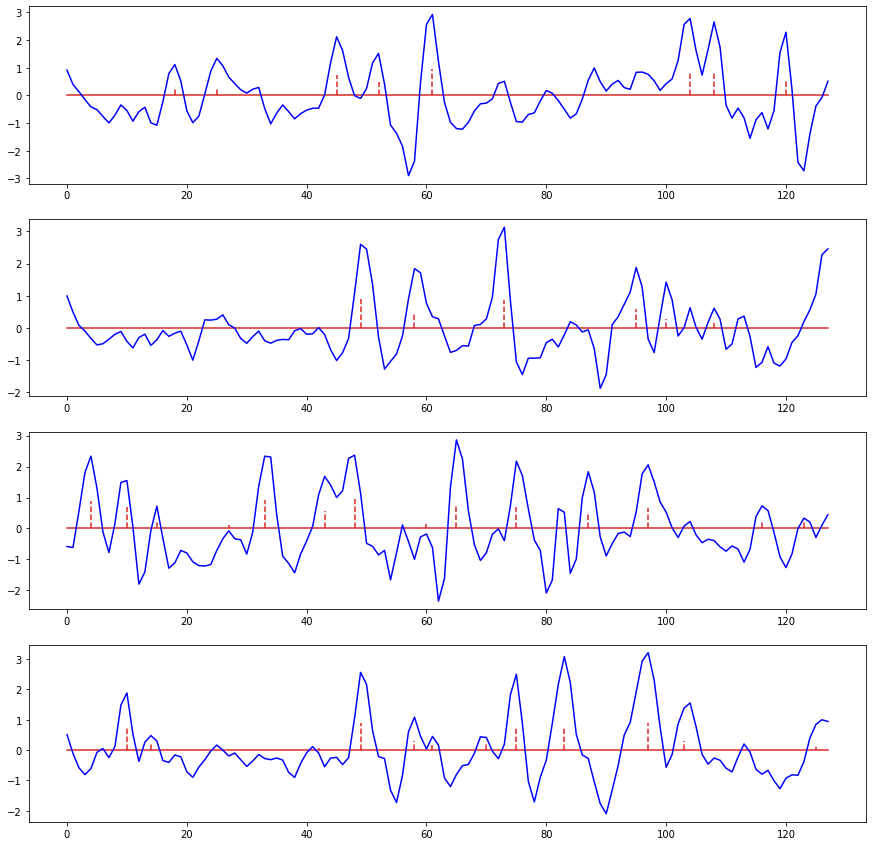

In [28]:
RI = refl_patch_IN_pa
RO = scaled_refl_patch_OUT_pa  
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

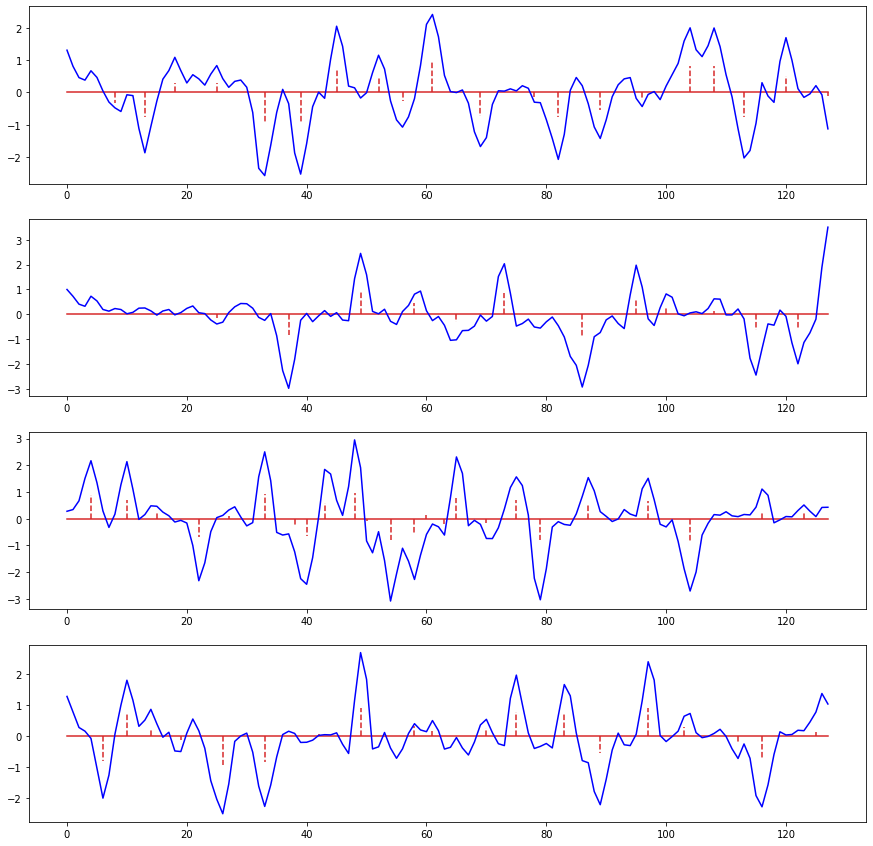

In [29]:
RI = refl_patch_IN_pana
RO = scaled_refl_patch_OUT_pana 
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(RO[fault_idx])[i][:,64],'b-')
plt.show()

In [30]:
np.save("/h1/bhoon/20220725_pix2pix_compare/p1/scaled_FD_X.npy",scaled_refl_patch_OUT_p1)
np.save("/h1/bhoon/20220725_pix2pix_compare/p1n-1/scaled_FD_X.npy",scaled_refl_patch_OUT_p1n_1)
np.save("/h1/bhoon/20220725_pix2pix_compare/pa/scaled_FD_X.npy",scaled_refl_patch_OUT_pa)
np.save("/h1/bhoon/20220725_pix2pix_compare/pana/scaled_FD_X.npy",scaled_refl_patch_OUT_pana)

np.save("/h1/bhoon/20220725_pix2pix_compare/FD_Y.npy",edge_patch)